# Movie Review Classification with IMDB

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import keras
from keras.datasets import imdb

Aquire Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 1000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

## Decode Data

In [3]:
def decode(data):
  word_index = imdb.get_word_index()  # Get word mapping dictionary
  reserved_word_index = dict([(value, key) for (key, value) in word_index.items()])
  decoded_review = ' '.join([reserved_word_index.get(i - 3, '?') for i in data])

  return decoded_review

print('Encoded data:', train_data[0])
print('Decoded data:', decode(train_data[0]))

Encoded data: [1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
Decoded data: ? this film was just brilliant casting ? ? story direction ? really ? the part they played and you co

## Vectorize Data (OneHotEncoding)

In [4]:
def vectorize(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

train_data = vectorize(train_data).astype(float)
test_data = vectorize(test_data).astype(float)

print('Vectorized Data:', list(train_data[0]))

Vectorized Data: [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.

## Build the Model

In [5]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(units = 16, activation = 'relu', input_shape = (10000,)))
model.add(keras.layers.Dense(units = 16, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Validation Data

In [6]:
valid_data = train_data[:1000]
train_data = train_data[1000:]

valid_labels = train_labels[:1000]
train_labels = train_labels[1000:]

## Train the Model

In [7]:
history = model.fit(
    x = train_data,
    y = train_labels,
    batch_size = 512,
    epochs = 20,
    verbose = True,
    validation_data = (valid_data, valid_labels)
)

Epoch 1/20
47/47 [==============================] - 3s 43ms/step - loss: 0.6017 - accuracy: 0.6940 - val_loss: 0.4146 - val_accuracy: 0.8390
Epoch 2/20
47/47 [==============================] - 2s 33ms/step - loss: 0.3896 - accuracy: 0.8548 - val_loss: 0.3425 - val_accuracy: 0.8640
Epoch 3/20
47/47 [==============================] - 2s 33ms/step - loss: 0.3355 - accuracy: 0.8672 - val_loss: 0.3627 - val_accuracy: 0.8380
Epoch 4/20
47/47 [==============================] - 2s 32ms/step - loss: 0.3220 - accuracy: 0.8683 - val_loss: 0.3262 - val_accuracy: 0.8570
Epoch 5/20
47/47 [==============================] - 2s 33ms/step - loss: 0.3137 - accuracy: 0.8693 - val_loss: 0.3190 - val_accuracy: 0.8600
Epoch 6/20
47/47 [==============================] - 2s 33ms/step - loss: 0.3052 - accuracy: 0.8758 - val_loss: 0.3186 - val_accuracy: 0.8650
Epoch 7/20
47/47 [==============================] - 2s 33ms/step - loss: 0.2972 - accuracy: 0.8778 - val_loss: 0.3202 - val_accuracy: 0.8590
Epoch 8/20
47

## Plot Training Process

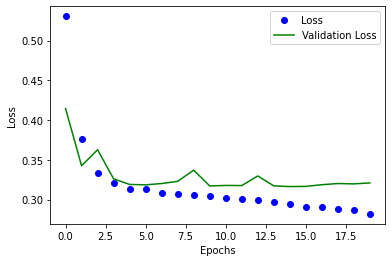

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label = 'Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

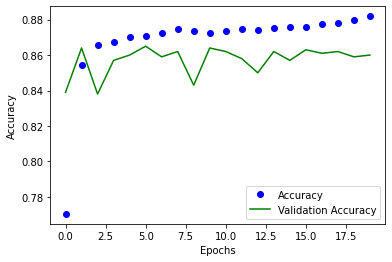

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Accuracy')
plt.plot(epochs, val_acc, 'g', label = 'Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Evaluate

In [10]:
results = model.evaluate(x = test_data, y = test_labels, verbose = False)
results

[0.3318290114402771, 0.8578799962997437]